In [85]:
#import all the necessary libraries
import torch
import torchvision
import numpy as np

#random
import random

#plotting 
import plotly.express as px

# load and show an image with Pillow
from PIL import Image
import matplotlib.pyplot as plt

In [86]:
#define the Sobel operator
class Sobel(torch.nn.Module):
    #constructor
    def __init__(self, reverse=False):
        super(Sobel, self).__init__()
        
        #TODO: Define the sobel kernels Sx and Sy; Use numpy and define the 3x3 Sobel filters
        if reverse:
            Sx = np.array([ [-1,0,1],
                            [-2,0,2],
                            [-1,0,1]], dtype=np.float32)
            
            Sy = np.array([ [-1,-2,-1],
                            [0,0,0],
                            [1,2,1]], dtype=np.float32)
        
        else:
            Sx = np.array([[1,0,-1],
                        [2,0,-2],
                        [1,0,-1]], dtype=np.float32)

            Sy = np.array([[1,2,1],
                            [0,0,0],
                            [-1,-2,-1]], dtype=np.float32)

    
        #reshape
        Sx = np.reshape(Sx, (1,1,3,3))
        
        #reshape
        Sy = np.reshape(Sy, (1,1,3,3))
        
        #TODO: use torch.nn.Conv2D to create a convolutional layer for the Sx; set the bias=False, kernel_size=3
        self.Sx = torch.nn.Conv2d(1, 1, kernel_size=3, bias=False)
        #Overwrite the kernel values 
        self.Sx.weight = torch.nn.Parameter(torch.from_numpy(Sx).float())

        #TODO: use torch.nn.Conv2D to create a convolutional layer for the Sx; set the bias=False, kernel_size=3
        self.Sy = torch.nn.Conv2d(1, 1, kernel_size=3, bias=False)
        #Overwrite the kernel values 
        self.Sy.weight = torch.nn.Parameter(torch.from_numpy(Sy).float())
        
        return
    
    def forward(self, x):
        #x is the input image; 
        
        #reshape it to 1x1x28x28
        x = torch.reshape(x, (1,1,28,28))
        
        #apply the kernels Sx and Sy
        gx = self.Sx(x)
        gy = self.Sy(x)
        
        #reshape it back to 1x28x28
        gx = gx.squeeze(0)
        gy = gy.squeeze(0)
        return gx, gy
        

In [87]:
#Load the example image to be used for debugging, convert to grayscale, and then convert to numpy array
image = np.asarray(Image.open('example.png').convert('L'))

#Show the image
px.imshow(image)

#Convert to tensor and reshape
image = torch.from_numpy(image).float()
image = torch.reshape(image, (1,28,28))

In [88]:
#TODO: Create an instance of the class Sobel
model = Sobel() 

In [89]:
#apply the kernel to the image by calling the forward function
gx,gy = model.forward(image)

#convert to numpy; size is now 28x28
gx = gx.permute(1,2,0).detach().numpy().squeeze(2)
gy = gy.permute(1,2,0).detach().numpy().squeeze(2)

In [90]:
#show the gradient x
px.imshow(gx)

In [91]:
#show the gradient y
px.imshow(gy)

In [92]:
#TODO: calculate and show the gradient magnitude
gradient_magnitude = None

gradient_magnitude = np.sqrt(gx**2 + gy**2)

px.imshow(gradient_magnitude)

In [93]:
#TODO: Calculate the gradient orientation and threshold anything less than e.g. 100
gradient_orientation = None
gradient_orientation = np.arctan2(gy,gx)
for y in range(gradient_orientation.shape[0]):
    for x in range(gradient_orientation.shape[1]):
        if (gradient_orientation[y,x]) < 0:
            gradient_orientation[y,x] = gradient_orientation[y,x] + 2*np.pi

px.imshow(gradient_orientation)

In [94]:
#TODO: Calculate the *edge* direction
edge_orientation = None

edge_orientation = np.arctan2(-gx, gy)

for y in range(edge_orientation.shape[0]):
    for x in range(edge_orientation.shape[1]):
        if (edge_orientation[y,x]) < 0:
            edge_orientation[y,x] = edge_orientation[y,x] + 2*np.pi

px.imshow(edge_orientation)

In [95]:
DATASET_PATH = "data"

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5,), (0.5,))])
#TODO: Download the MNIST dataset
training_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(training_dataset, batch_size=10)


testing_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True)
testloader = torch.utils.data.DataLoader(testing_dataset, batch_size=10)

#Make sure there are 60K training examples, and 10K testing examples
print(training_dataset, testing_dataset)


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           ) Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test


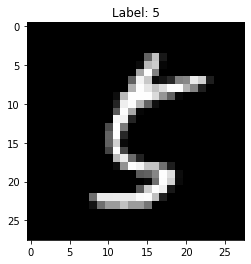

In [125]:
#TODO: Get a random image from the training dataset and show it
img = training_dataset[random.randint(0, 59999)]

plt.title("Label: " + str(img[1]))
plt.imshow(img[0].permute(1,2,0).numpy()[:,:,0], cmap='gray')

In [97]:
#TODO: Repeat the same steps as before

#1. Apply the Sobel kernels and show the gx and gy
gx,gy = model.forward(image)

gx = gx.permute(1,2,0).detach().numpy().squeeze(2)
gy = gy.permute(1,2,0).detach().numpy().squeeze(2)

#2. Calculate gradient magnitude and show it
gradient_magnitude = np.sqrt(gx**2 + gy**2)

#3. Calculate gradient orientation and show it
gradient_orientation = np.arctan2(gy,gx)
for y in range(gradient_orientation.shape[0]):
    for x in range(gradient_orientation.shape[1]):
        if (gradient_orientation[y,x]) < 0:
            gradient_orientation[y,x] = gradient_orientation[y,x] + 2*np.pi
            
#4. Calculate the *edge* orientation and show it
edge_orientation = np.arctan2(-gx, gy)

for y in range(edge_orientation.shape[0]):
    for x in range(edge_orientation.shape[1]):
        
        if (edge_orientation[y,x]) < 0:
            edge_orientation[y,x] = edge_orientation[y,x] + 2*np.pi
            
#5. Change the signs of the Sobel filter and see how that affects the edge orientation
model2 = Sobel(reverse = True)

gxR,gyR = model2.forward(image)

gxR = gxR.permute(1,2,0).detach().numpy().squeeze(2)
gyR = gyR.permute(1,2,0).detach().numpy().squeeze(2)

edge_orientation_reverse = np.arctan2(-gxR, gyR)

for y in range(edge_orientation_reverse.shape[0]):
    for x in range(edge_orientation_reverse.shape[1]):
        
        if (edge_orientation_reverse[y,x]) < 0:
            edge_orientation_reverse[y,x] = edge_orientation_reverse[y,x] + 2*np.pi



In [98]:
px.imshow(gx)

In [99]:
px.imshow(gy)

In [100]:
px.imshow(gradient_magnitude)

In [101]:
px.imshow(gradient_orientation)

In [102]:
px.imshow(edge_orientation)

In [103]:
px.imshow(edge_orientation_reverse)